In [45]:
# Importing Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [17]:
# Creating Synthetic Dataset

x,y = make_classification(n_samples = 200, 
                          n_features = 2, 
                          n_informative = 1, 
                          n_redundant = 0,
                          n_classes = 2, 
                          n_clusters_per_class = 1, 
                          class_sep = 1, 
                          random_state = 20)

<Axes: >

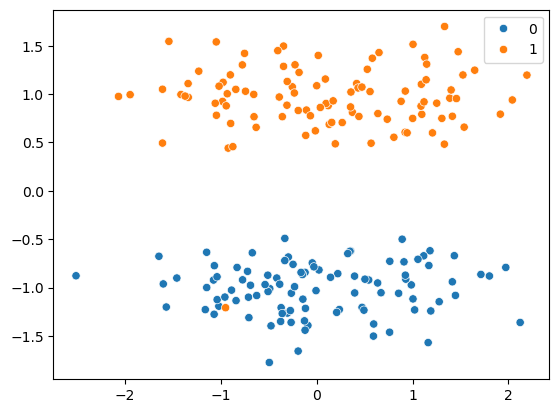

In [18]:
sns.scatterplot(x = x[:,0], y = x[:,1], hue = y)

In [19]:
# Splitting the data
x_train,x_test,y_train,y_test = train_test_split(x,y,
                                                test_size = 0.2,
                                                stratify = y,
                                                random_state = 20)

In [21]:
# Shapes
print("x_train  Shape ",x_train.shape)
print("x_test  Shape ",x_test.shape)
print("y_train  Shape ",y_train.shape)
print("y_test  Shape ",y_test.shape)

x_train  Shape  (160, 2)
x_test  Shape  (40, 2)
y_train  Shape  (160,)
y_test  Shape  (40,)


# Logistc Regression - Scartch

In [53]:
class LogReg:
    def __init__(self,epochs,learning_rate):
        self.epochs = epochs
        self.learning_rate = learning_rate
        self.intercept_ = None
        self.coef_ = None
        
    def fit(self,x_train,y_train):
        X = np.array(x_train)
        Y = np.array(y_train).reshape(-1,1)

        X = np.insert(X,0,1,axis =1)

        m,n = X.shape

        self.weights = np.ones((n,1))

        for epoch in range(self.epochs):

            z = X @ self.weights
            y_hat = 1/(1+np.exp(-z))

            gradient = (X.T @ (Y - y_hat))/m
            self.weights += self.learning_rate*gradient

        self.intercept_ = self.weights[0][0]
        self.coef_ = self.weights[1:].flatten()

    def predict(self,x_test):
        X = np.array(x_test)
        X = np.insert(X,0,1,axis = 1)
        z = X @ self.weights
        y_hat = 1/(1+np.exp(-z))
        return (y_hat>=0.5).astype(int)


In [69]:
logreg = LogReg(100,0.1)

In [70]:
logreg.fit(x_train,y_train)

In [73]:
logreg.coef_

array([0.39960194, 2.50904972])

In [74]:
logreg.intercept_

np.float64(0.33225225098221234)

In [71]:
y_pred = logreg.predict(x_test)

In [72]:
print("Accuracy : ",accuracy_score(y_test,y_pred))

Accuracy :  0.975


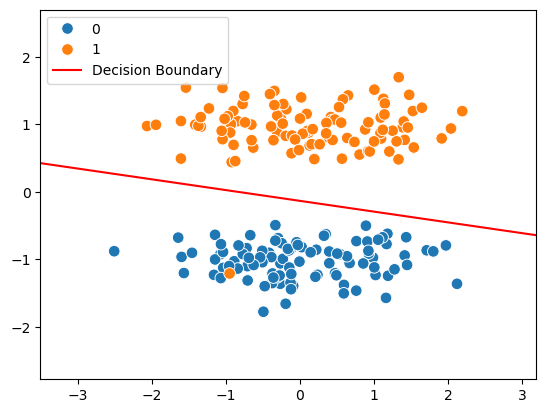

In [85]:
# for 2D logistic regression visualization

x1_min, x1_max = x[:,0].min() - 1, x[:,0].max() + 1
x2_min, x2_max = x[:,1].min() - 1, x[:,1].max() + 1

xx1, xx2 = np.meshgrid(
    np.linspace(x1_min, x1_max, 100),
    np.linspace(x2_min, x2_max, 100)
)

grid = np.c_[xx1.ravel(), xx2.ravel()]
X_grid = np.insert(grid, 0, 1, axis=1)
probs = 1 / (1 + np.exp(-(X_grid @ logreg.weights)))
probs = probs.reshape(xx1.shape)

sns.scatterplot(x=x[:,0], y=x[:,1], hue=y, s=70)
CS = plt.contour(xx1, xx2, probs, levels=[0.5], colors='red')  # draw line

plt.plot([], [], color='red', label='Decision Boundary')

plt.legend()
plt.show()
